In [217]:
import pandas as pd
import time
import seaborn as sn
import torch
import time
from torch import nn, optim
import plotly.express as px
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
#from torchvision import transforms, utils
from sklearn.model_selection import train_test_split
import numpy as np
import random
import locale
locale.setlocale(locale.LC_ALL, '')

from confusion import cm
import Net

torch.manual_seed(47)
random.seed(47)

In [218]:
train = "data/generated/train_augmented.csv"
train = pd.read_csv(train)
train['PAM50'] = train['PAM50'].astype('category')
train['PAM50'] = train['PAM50'].cat.codes.values

In [219]:
train.columns

Index(['B cells naive', 'B cells memory', 'Plasma cells', 'T cells CD8',
       'T cells CD4 naive', 'T cells CD4 memory resting',
       'T cells CD4 memory activated', 'T cells follicular helper',
       'T cells regulatory (Tregs)', 'T cells gamma delta', 'NK cells resting',
       'NK cells activated', 'Monocytes', 'Macrophages M0', 'Macrophages M1',
       'Macrophages M2', 'Dendritic cells resting',
       'Dendritic cells activated', 'Mast cells resting',
       'Mast cells activated', 'Eosinophils', 'Neutrophils', 'Cell_Cycle',
       'HIPPO', 'MYC', 'NOTCH', 'NRF2', 'PI3K', 'TGF.Beta', 'RTK_RAS', 'TP53',
       'WNT', 'Hypoxia', 'SRC', 'ESR1', 'ERBB2', 'age_at_diagnosis', 'PROLIF',
       'RFS', 'RFSE', 'DSSE10', 'DSS10', 'grade', 'stage',
       'lymph_nodes_positive', 'TP53.mut', 'PIK3CA.mut', 'NPI', 'CELLULARITY',
       'HT', 'RT', 'CT', 'PAM50'],
      dtype='object')

In [379]:
## X_train = train[['Cell_Cycle',
##       'HIPPO', 'MYC', 'NOTCH', 'NRF2', 'PI3K', 'TGF.Beta', 'RTK_RAS', 'TP53',
##       'WNT', 'Hypoxia', 'SRC', 'ESR1', 'ERBB2','PROLIF','grade','stage']]

X_train = train[['Cell_Cycle',
       'HIPPO', 'MYC', 'NOTCH', 'NRF2', 'PI3K', 'TGF.Beta', 'RTK_RAS', 'TP53',
       'WNT', 'Hypoxia', 'SRC', 'ESR1', 'ERBB2','lymph_nodes_positive']]
y_train = train["PAM50"]

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=47)

In [381]:
X_train = X_train.to_numpy(dtype=float)
y_train = y_train.to_numpy()
X_test = X_test.to_numpy(dtype=float)
y_test = y_test.to_numpy()

In [382]:
len(X_train)

2244

In [391]:
params = {
    'lr':0.001,
    'epochs':200,
    'batch_size':200,
    'fc1':200,
    'fc2':120,
    'fc3':84,
    'dropout':0.1
}

78,8%
    - Validation accuracy = 74,6% 

| epoch 031 | loss=6,18
--- %s seconds --- 0,941
    - Training accuracy   = 79,1%
    - Validation accuracy = 76,3% 

| epoch 032 | loss=5,81
--- %s seconds --- 0,969
    - Training accuracy   = 79,9%
    - Validation accuracy = 76,9% 

| epoch 033 | loss=5,87
--- %s seconds --- 0,997
    - Training accuracy   = 79,9%
    - Validation accuracy = 76% 

| epoch 034 | loss=5,96
--- %s seconds --- 1,02
    - Training accuracy   = 79,9%
    - Validation accuracy = 76,3% 

| epoch 035 | loss=5,88
--- %s seconds --- 1,05
    - Training accuracy   = 79%
    - Validation accuracy = 76,2% 

| epoch 036 | loss=5,68
--- %s seconds --- 1,09
    - Training accuracy   = 80,2%
    - Validation accuracy = 77% 

| epoch 037 | loss=5,66
--- %s seconds --- 1,12
    - Training accuracy   = 79,8%
    - Validation accuracy = 77% 

| epoch 038 | loss=5,66
--- %s seconds --- 1,15
    - Training accuracy   = 81,6%
    - Validation accuracy = 77% 

| epoch 039 | loss=5,

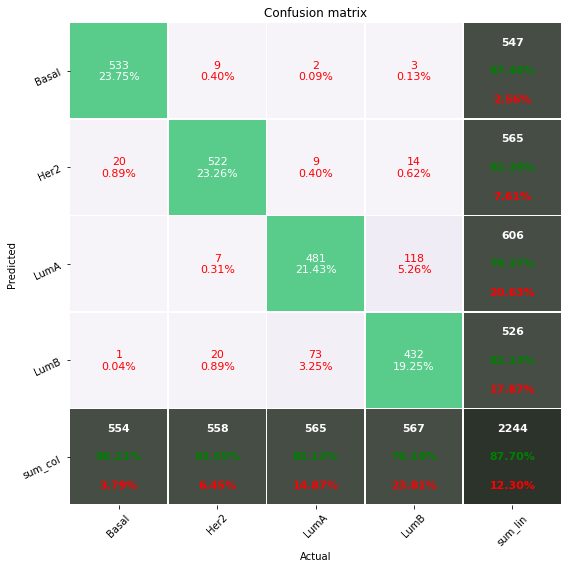

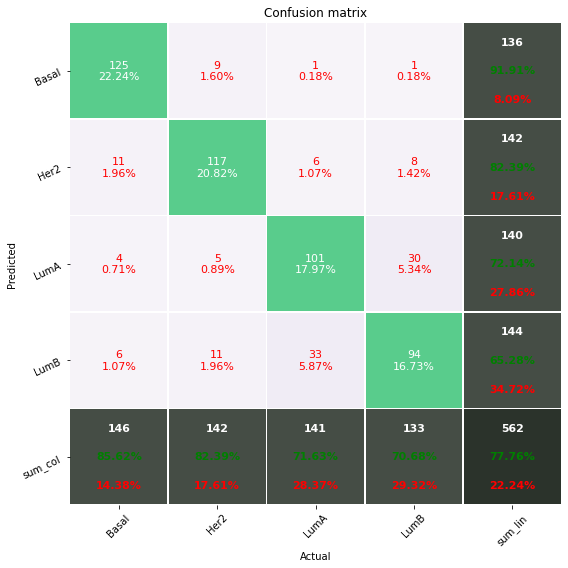

In [392]:
torch.manual_seed(47)
random.seed(47)

model = Net.Net(X_train.shape[1], params)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=params['lr'])

# Training
start_time = time.time()
epochs = params['epochs']
loss_ = []
train_acc = []
val_acc = []
epochs_ = []
for epoch in range(1, epochs + 1):
    epochs_.append(epoch)
    loss, t_acc, t_conf = Net.train(model, criterion, optimizer, X_train, y_train, batch_size=params['batch_size'])
    train_acc.append(t_acc)
    v_acc, v_conf = Net.val(model, criterion, optimizer, X_test, y_test, batch_size=params['batch_size'])
    val_acc.append(v_acc)
    loss_.append(loss)
    print(f'| epoch {epoch:03d} | loss={round(loss, 4):.3n}')
    print(f"--- %s seconds --- {round((time.time() - start_time),4):.3n}")
    print(f'    - Training accuracy   = {round(t_acc,4):.3n}%')
    print(f'    - Validation accuracy = {round(v_acc,4):.3n}% \n')

train_accuracy = pd.DataFrame({'epochs':epochs_, 'accuracy':train_acc, 'kind':['train']*len(epochs_)})
val_accuracy = pd.DataFrame({'epochs':epochs_, 'accuracy':val_acc, 'kind':['validation']*len(epochs_)})
accuracy = pd.concat([train_accuracy, val_accuracy])
cm(t_conf)
cm(v_conf)

Text(0.5, 1.0, 'Accuracy')

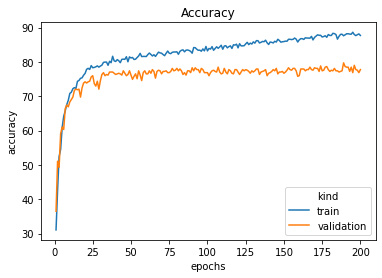

In [393]:
sn.lineplot(x='epochs', y='accuracy', hue='kind', data=accuracy).set_title("Accuracy")

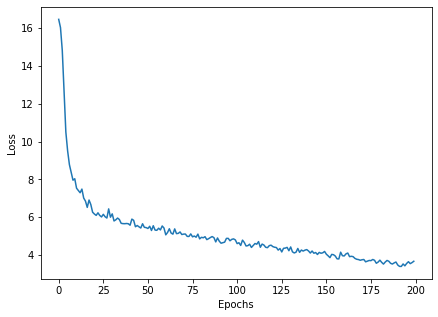

In [394]:
plt.figure(figsize=(7, 5))
plt.plot(loss_)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()